In [2]:
import pandas as pd
a=pd.read_csv("/content/drive/MyDrive/breast_cancer_survival (1).csv")
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [4]:
target=a['Patient_Status']
print(target)

0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 334, dtype: object


In [5]:
features=a.drop(columns=['Date_of_Surgery','Histology','Date_of_Last_Visit','Patient_Status','Gender'],axis=1)
print(features)

     Age  Protein1  Protein2  Protein3  Protein4 Tumour_Stage ER status  \
0     42  0.952560   2.15000  0.007972 -0.048340           II  Positive   
1     54  0.000000   1.38020 -0.498030 -0.507320           II  Positive   
2     63 -0.523030   1.76400 -0.370190  0.010815           II  Positive   
3     78 -0.876180   0.12943 -0.370380  0.132190            I  Positive   
4     42  0.226110   1.74910 -0.543970 -0.390210           II  Positive   
..   ...       ...       ...       ...       ...          ...       ...   
329   59  0.024598   1.40050  0.024751  0.280320           II  Positive   
330   41  0.100120  -0.46547  0.472370 -0.523870            I  Positive   
331   54  0.753820   1.64250 -0.332850  0.857860           II  Positive   
332   74  0.972510   1.42680 -0.366570 -0.107820           II  Positive   
333   66  0.286380   1.39980  0.318830  0.836050           II  Positive   

    PR status HER2 status                 Surgery_type  
0    Positive    Negative                 

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(a, test_size=0.2, random_state=100)
print(df_train)
print(df_test)
print(df_train.shape, df_test.shape)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
15    77  FEMALE -0.058151   0.67432  -0.42303  0.167530            I   
184   56  FEMALE -0.586410   0.22446  -0.30652 -1.596500           II   
221   77  FEMALE  0.477710   0.81881  -0.40630 -0.654790            I   
157   62  FEMALE  0.542400   1.79260  -0.56599 -0.017206           II   
159   47  FEMALE -0.198190   0.62597  -0.28137 -0.477740           II   
..   ...     ...       ...       ...       ...       ...          ...   
53    82  FEMALE  0.659600   1.55410  -0.82864  0.278550           II   
79    51  FEMALE -0.476200   1.79460  -0.14773 -0.307780           II   
323   57  FEMALE  0.000000   0.20684  -0.16110  0.374030            I   
280   57  FEMALE -0.213780  -0.62814   1.02260  0.202440           II   
8     58  FEMALE -1.268500   0.10613   1.13520 -0.394920           II   

                          Histology ER status PR status HER2 status  \
15    Infiltrating Ductal Carcinoma  Positive  Posit

In [8]:
from sklearn.model_selection import train_test_split
column_name_mapping = {'ER status': 'ERstatus', 'PR status': 'PRstatus', 'HER2 status': 'HER2status'}

# Use the rename() method to change the column names
a.rename(columns=column_name_mapping, inplace=True)
a.HER2status[a.HER2status== 'Positive'] = 1
a.HER2status[a.HER2status== 'Negative'] = 0
a.Tumour_Stage[a.Tumour_Stage == 'II'] = 2
a.Tumour_Stage[a.Tumour_Stage == 'I'] = 1
a.Tumour_Stage[a.Tumour_Stage == 'III'] = 3
a.Surgery_type[a.Surgery_type == 'Other'] = 1
a.Surgery_type[a.Surgery_type == 'Lumpectomy'] = 2
a.Surgery_type[a.Surgery_type == 'Modified Radical Mastectomy'] = 3
a.Surgery_type[a.Surgery_type == 'Simple Mastectomy'] = 4
a = a.dropna()
y = a['Patient_Status']
X = a.drop(columns = ['Date_of_Surgery','Date_of_Last_Visit','Histology','Gender','ERstatus','PRstatus'])
print(a)
print(X)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340            2   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320            2   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815            2   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            1   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210            2   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320            2   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            1   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860            2   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820            2   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050            2   

                          Histology  ERstatus  PRstatus HER2status  \
0     Infiltrating Ductal Carcinoma  Positive  Positi

<ipython-input-8-f765dd896614>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.HER2status[a.HER2status== 'Positive'] = 1
<ipython-input-8-f765dd896614>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.HER2status[a.HER2status== 'Negative'] = 0
<ipython-input-8-f765dd896614>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.Tumour_Stage[a.Tumour_Stage == 'II'] = 2
<ipython-input-8-f765dd896614>:9: SettingWithCopyWarning: 
A value i

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)


[0.96666667 0.94166667 0.95833333 0.95833333 0.95833333 0.95833333
 0.95833333 0.95       0.94166667 0.95833333 0.95833333 0.95833333
 0.95833333 0.95833333 0.95833333 0.95       0.95833333 0.95
 0.96666667]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


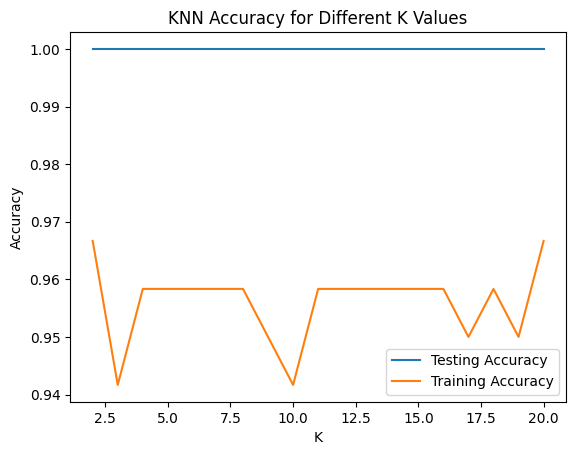

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_accuracy = np.empty(19)
test_accuracy = np.empty(19)


for i, k in enumerate(range(2, 21)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

print(train_accuracy)
print(test_accuracy)
plt.title('KNN Accuracy for Different K Values')
plt.plot(range(2, 21), test_accuracy, label='Testing Accuracy')
plt.plot(range(2, 21), train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [26]:
import pandas as pd
b=pd.read_csv("/content/drive/MyDrive/Japan_life_expectancy (2).csv")
b.head()

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,Akita,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,Aomori,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,Chiba,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


In [28]:
y = b['Life_expectancy']
c = b.drop(columns = 'Prefecture',axis = 1)
c.head()

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,319.45,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,257.30,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,254.50,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,314.95,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,272.50,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


In [36]:
train, valid, test = np.split(c.sample(frac=1), [int(0.6*len(b)), int(0.8*len(c))])

In [37]:
def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [38]:
train, X_train, y_train = scale_dataset(train)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

mean squared error list: [0.47628000000000004, 0.2376949999999976, 0.24230111111110716, 0.1975099999999996, 0.22988840000000105, 0.1870777777777773, 0.18221877551020402, 0.17218468750000102, 0.15336555555555595, 0.14072460000000123, 0.15235586776859716, 0.14108312500000025, 0.15306798816568187, 0.15153147959183944, 0.14929675555555716, 0.15495605468749696, 0.14993806228373258, 0.15269249999999607, 0.14223193905816536, 0.14909359999999544]
least mean squared error occured = 0.14072460000000123
least mse is occured at k value =  9


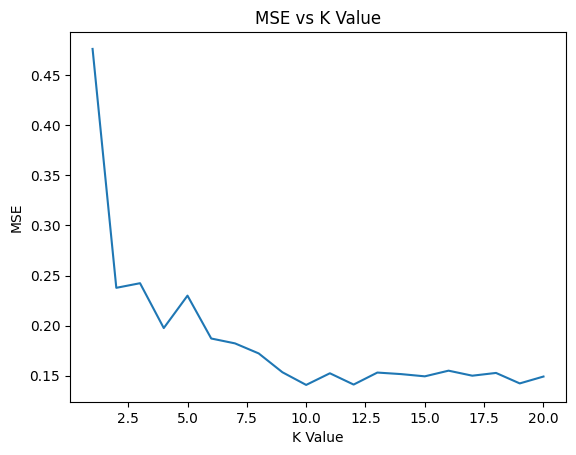

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mse_values = []


for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
print("mean squared error list:",mse_values)
print("least mean squared error occured =",min(mse_values))
minimum = min(mse_values)
print("least mse is occured at k value = ",mse_values.index(minimum))
# Plot the results
plt.plot(range(1, 21), mse_values)
plt.title('MSE vs K Value')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.show()